##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# What does a neural network learn?

### Setting up

**Notebook setup**. Select the "Edit" menu, then "Notebook settings". Choose "GPU" as the hardware accelerator. Check that "Omit code cell output..." is unchecked (so that the output is saved).

**Upload dataset** Select the folder icon from the left sidebar menu. Click the upload button and select the file "lab6data.zip" from your computer.

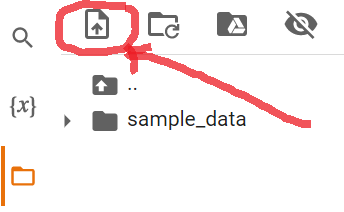

### Extract the dataset

In [ ]:
!unzip lab6data.zip

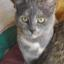

In [19]:
from PIL import Image
im = Image.open("lab6/train/Cat/161.jpg")
display(im)

### Import TensorFlow

In [20]:
import tensorflow as tf

from tensorflow.keras import layers, models


### Prepare the dataset for Keras

In [41]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("lab6/train",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 1800 files belonging to 2 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


In [22]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory("lab6/test",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 200 files belonging to 2 classes.


### Experiment 1: train a model from scratch

Follow the instructions in moodle. You can start adding code in cells below and running them by pressing the forward arrow button in the corner. Add more cells as needed.

In [23]:
def make_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2))
    return model

model = make_cnn_model()

In [24]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
history = model.fit(train_ds, epochs=15)

Epoch 1/15
57/57 [==============================] - 2s 8ms/step - loss: 4.9247 - accuracy: 0.5089
Epoch 2/15
57/57 [==============================] - 0s 8ms/step - loss: 0.6788 - accuracy: 0.5628
Epoch 3/15
57/57 [==============================] - 0s 7ms/step - loss: 0.6703 - accuracy: 0.5850
Epoch 4/15
57/57 [==============================] - 0s 8ms/step - loss: 0.6544 - accuracy: 0.6128
Epoch 5/15
57/57 [==============================] - 0s 7ms/step - loss: 0.6528 - accuracy: 0.6089
Epoch 6/15
57/57 [==============================] - 0s 8ms/step - loss: 0.6151 - accuracy: 0.6494
Epoch 7/15
57/57 [==============================] - 0s 7ms/step - loss: 0.5819 - accuracy: 0.6783
Epoch 8/15
57/57 [==============================] - 0s 8ms/step - loss: 0.5527 - accuracy: 0.7156
Epoch 9/15
57/57 [==============================] - 0s 7ms/step - loss: 0.5049 - accuracy: 0.7417
Epoch 10/15
57/57 [==============================] - 0s 7ms/step - loss: 0.4652 - accuracy: 0.7672
Epoch 11/15
57/57 [

In [25]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(test_acc)

7/7 - 0s - loss: 1.1937 - accuracy: 0.5650 - 178ms/epoch - 25ms/step
0.5649999976158142


Q1: What was the result (average accuracy of classifying cats and dogs in experiment 1)? Explain or comment the result. [The average accuracy of classifying cats and dogs was 56.5%. This accuracy is really bad. Determining between 2 classes and ~50% result is almost the same as choosing randomly if it is a cat or dog.]

### Experiment 2: side channel data

In [11]:
!mkdir -p lab6/train2/Cat lab6/train2/Dog lab6/test2/Cat lab6/test2/Dog


In [12]:
import os
import os.path
from PIL import ImageDraw

In [13]:
def inject_text(ipath, opath, text):
    files = os.listdir(ipath)
    for fn in files:
        src = os.path.join(ipath, os.path.basename(fn))
        dest = os.path.join(opath, os.path.basename(fn))
        im = Image.open(src)
        canvas = ImageDraw.Draw(im)
        canvas.text((3,3), text, fill=(255, 0, 0))
        im.save(dest)

In [14]:
inject_text("lab6/train/Cat", "lab6/train2/Cat", "Cat")
inject_text("lab6/train/Dog", "lab6/train2/Dog", "Dog")
inject_text("lab6/test/Cat", "lab6/test2/Cat", "Cat")
inject_text("lab6/test/Dog", "lab6/test2/Dog", "Dog")

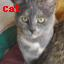

In [15]:
im = Image.open("lab6/train2/Cat/161.jpg")
display(im)

In [26]:
train_ds2 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))
test_ds2 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 1800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [27]:
model2 = make_cnn_model()
model2.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
history = model2.fit(train_ds2, epochs=5)

Epoch 1/5
57/57 [==============================] - 2s 8ms/step - loss: 8.4513 - accuracy: 0.6817
Epoch 2/5
57/57 [==============================] - 0s 7ms/step - loss: 0.0418 - accuracy: 0.9889
Epoch 3/5
57/57 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 4/5
57/57 [==============================] - 0s 7ms/step - loss: 3.4459e-04 - accuracy: 1.0000
Epoch 5/5
57/57 [==============================] - 0s 8ms/step - loss: 8.0230e-05 - accuracy: 1.0000


In [28]:
test_loss, test_acc = model2.evaluate(test_ds2, verbose=2)
print(test_acc)

7/7 - 0s - loss: 3.6131e-04 - accuracy: 1.0000 - 202ms/epoch - 29ms/step
1.0


Q2: What was the result after injecting "hints" into images? Explain or comment the result. [The accuracy for this was 100%. But the "purpose" of the model changed. It no longer detects cat or dog images, however it is now a word detection model, when it finds the word 'cat' that is also coincidentally on a cat photo it says the photo has a cat on it. If i were to put the word 'cat' on a dog photo now, it would also classify that photo as a cat, which would be wrong. The images are now basically irrelevant.]

### Experiment 3: adversarial data

In [29]:
!mkdir -p lab6/test3/Cat lab6/test3/Dog

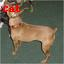

In [30]:
inject_text("lab6/test/Cat", "lab6/test3/Cat", "Dog")
inject_text("lab6/test/Dog", "lab6/test3/Dog", "Cat")
im = Image.open("lab6/test3/Dog/10010.jpg")
display(im)

In [31]:
test_ds3 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test3",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 200 files belonging to 2 classes.


In [32]:
test_loss, test_acc = model2.evaluate(test_ds3, verbose=2)
print(test_acc)

7/7 - 0s - loss: 11.2005 - accuracy: 0.0000e+00 - 71ms/epoch - 10ms/step
0.0


Q3: What was the result after reversing the captions on test images? Explain or comment the result.[The accuracy is now at 0%, because the model thinks that if a pic has the word 'cat' on it, then it's a cat photo and same for the word 'dog'. Now that the words are switched around the models accuracy is 0%]

### Experiment 4: transfer learning

In [34]:
base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.trainable = False

In [35]:
def make_pretrained_model(base_model):
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(2)(x)
    model = tf.keras.Model(inputs, outputs)
    return model

In [36]:
model4 = make_pretrained_model(base_model)

In [37]:
train_ds4 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

Found 1800 files belonging to 2 classes.


In [ ]:
model4.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model4.fit(train_ds4, epochs=15)

In [61]:
test_ds4 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test3",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

Found 200 files belonging to 2 classes.


In [62]:
test_loss, test_acc = model4.evaluate(test_ds4, verbose=2)
print(test_acc)

7/7 - 1s - loss: 0.2228 - accuracy: 0.8900 - 767ms/epoch - 110ms/step
0.8899999856948853


Q4: The ResNet50 model was trained with "Cat" and "Dog" captions placed correctly and tested with the captions reversed like in experiment 3. What happened? Explain or comment the result. [The  ResNet50 deep neural network model had an accuracy of 89%, even if the training data and the test data contained opposite words of 'cat' and 'dog' on the images, the model understood that the words were not the only relevant data, it also looked what the images contained. I also tried retraining the model with the first train datasets where there were no captions placed on the images to see if the accuracy would increase. The accuracy increased slightly ~1.5%. When running the test2 data with the train2 data, where the captions were placed correctly, the accuracy was the highest. The outcomes were very logical.]

In [44]:
model5 = make_pretrained_model(base_model)

In [51]:
train_ds5 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

Found 1800 files belonging to 2 classes.


In [52]:
model5.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model5.fit(train_ds5, epochs=15)

Epoch 1/15
57/57 [==============================] - 9s 96ms/step - loss: 0.0685 - accuracy: 0.9744
Epoch 2/15
57/57 [==============================] - 6s 96ms/step - loss: 0.0516 - accuracy: 0.9861
Epoch 3/15
57/57 [==============================] - 6s 99ms/step - loss: 0.0472 - accuracy: 0.9894
Epoch 4/15
57/57 [==============================] - 6s 97ms/step - loss: 0.0396 - accuracy: 0.9944
Epoch 5/15
57/57 [==============================] - 6s 99ms/step - loss: 0.0364 - accuracy: 0.9961
Epoch 6/15
57/57 [==============================] - 6s 98ms/step - loss: 0.0297 - accuracy: 0.9972
Epoch 7/15
57/57 [==============================] - 6s 101ms/step - loss: 0.0280 - accuracy: 0.9972
Epoch 8/15
57/57 [==============================] - 6s 98ms/step - loss: 0.0279 - accuracy: 0.9967
Epoch 9/15
57/57 [==============================] - 6s 101ms/step - loss: 0.0234 - accuracy: 0.9989
Epoch 10/15
57/57 [==============================] - 6s 98ms/step - loss: 0.0210 - accuracy: 0.9994
Epoch 1

In [55]:
test_ds5 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test3",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

Found 200 files belonging to 2 classes.


In [58]:
test_loss, test_acc = model4.evaluate(test_ds5, verbose=2)
print(test_acc)

7/7 - 1s - loss: 0.2141 - accuracy: 0.9050 - 751ms/epoch - 107ms/step
0.9049999713897705
